In [3]:
# Data Exploration Notebook for DREAMT Dataset
# This notebook explores and visualizes the sleep data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import sys

# Add paths
import sys
from pathlib import Path

# Add project root and src to path
project_root = Path.cwd().parent
sys.path.append(str(project_root))
sys.path.append(str(project_root / 'src'))
sys.path.append(str(project_root / 'configs'))

# Now import
from config import RAW_DATA_DIR, PROCESSED_DATA_DIR, SLEEP_STAGES_SIMPLIFIED
from data.preprocess_dreamt import DREAMTPreprocessor

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")



Configuration loaded successfully!
Project root: /Users/dawoudmahmud/WatchSleepNet/WatchSleepNet-Reproduction
Using 3 sleep stage classes
Primary features: ['ACC_X', 'ACC_Y', 'ACC_Z', 'HR']


In [4]:
# %% [markdown]
# # 1. Load Raw Data

# %%
# Find CSV files
csv_files = list(RAW_DATA_DIR.glob("*.csv"))
print(f"Found {len(csv_files)} patient CSV file(s):")
for f in csv_files:
    print(f"  - {f.name}")

# %%
# Load first patient
if len(csv_files) > 0:
    df = pd.read_csv(csv_files[0])
    print(f"\nLoaded: {csv_files[0].name}")
    print(f"Shape: {df.shape}")
    print(f"\nColumns: {df.columns.tolist()}")
    print(f"\nFirst few rows:")
    display(df.head(10))
else:
    print("No CSV files found! Please add data to data/raw/")


Found 4 patient CSV file(s):
  - S005_whole_df.csv
  - S003_whole_df.csv
  - S067_whole_df.csv
  - S008_whole_df.csv

Loaded: S005_whole_df.csv
Shape: (1991873, 14)

Columns: ['TIMESTAMP', 'BVP', 'ACC_X', 'ACC_Y', 'ACC_Z', 'TEMP', 'EDA', 'HR', 'IBI', 'Sleep_Stage', 'Obstructive_Apnea', 'Central_Apnea', 'Hypopnea', 'Multiple_Events']

First few rows:


,TIMESTAMP,BVP,ACC_X,ACC_Y,ACC_Z,TEMP,EDA,HR,IBI,Sleep_Stage,Obstructive_Apnea,Central_Apnea,Hypopnea,Multiple_Events
0,0.000000,8.41,-65.0,-8.0,-4.0,34.41,0.157585,71.0,NaN,P,NaN,NaN,NaN,NaN
1,0.015625,8.98,-65.0,-8.0,-4.0,34.41,0.157585,71.0,NaN,P,NaN,NaN,NaN,NaN
2,0.031250,9.13,-65.0,-8.0,-4.0,34.41,0.157585,71.0,NaN,P,NaN,NaN,NaN,NaN
3,0.046875,8.98,-65.0,-8.0,-4.0,34.41,0.157585,71.0,NaN,P,NaN,NaN,NaN,NaN
4,0.062500,8.60,-65.0,-8.0,-4.0,34.41,0.157585,71.0,NaN,P,NaN,NaN,NaN,NaN
5,0.078125,8.00,-65.0,-8.0,-4.0,34.41,0.157585,71.0,NaN,P,NaN,NaN,NaN,NaN
6,0.093750,7.16,-64.0,-8.0,-5.0,34.41,0.157585,71.0,NaN,P,NaN,NaN,NaN,NaN
7,0.109375,6.10,-64.0,-8.0,-5.0,34.41,0.157585,71.0,NaN,P,NaN,NaN,NaN,NaN
8,0.125000,4.90,-65.0,-8.0,-4.0,34.41,0.157585,71.0,NaN,P,NaN,NaN,NaN,NaN
9,0.140625,3.72,-65.0,-8.0,-4.0,34.41,0.157585,71.0,NaN,P,NaN,NaN,NaN,NaN


Data Statistics:
Duration: 31123.00 seconds (8.65 hours)
Total samples: 1,991,873

Sleep stage distribution:
Sleep_Stage
N2    921600
P     584512
R     222720
W     178561
N1     74880
N3      9600
Name: count, dtype: int64


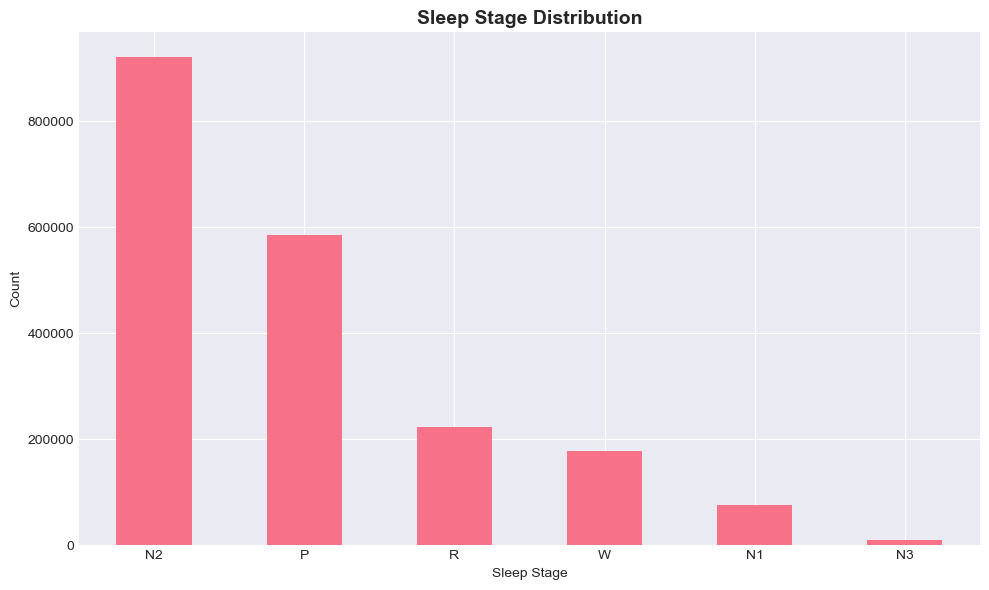

In [5]:
# %% [markdown]
# # 2. Data Statistics

# %%
# Basic statistics
print("Data Statistics:")
print(f"Duration: {df['TIMESTAMP'].max():.2f} seconds ({df['TIMESTAMP'].max()/3600:.2f} hours)")
print(f"Total samples: {len(df):,}")
print(f"\nSleep stage distribution:")
print(df['Sleep_Stage'].value_counts())

# %%
# Visualize sleep stage distribution
fig, ax = plt.subplots(figsize=(10, 6))
df['Sleep_Stage'].value_counts().plot(kind='bar', ax=ax)
ax.set_title('Sleep Stage Distribution', fontsize=14, fontweight='bold')
ax.set_xlabel('Sleep Stage')
ax.set_ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


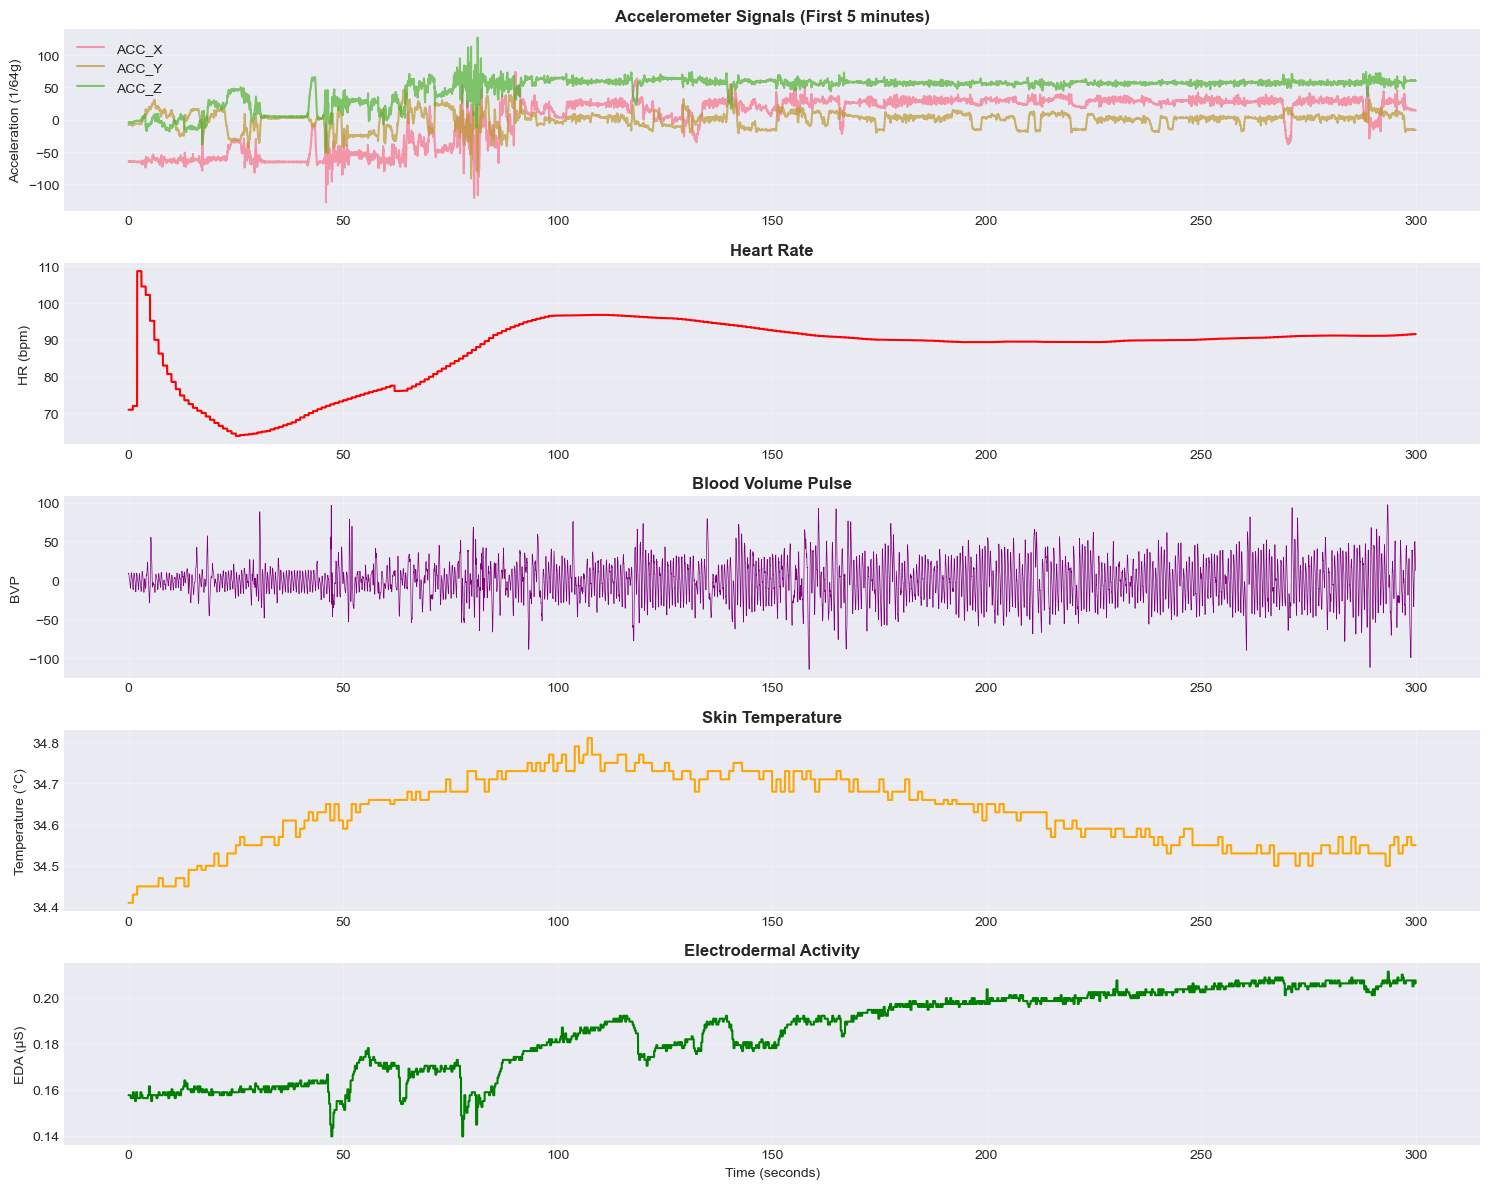

In [6]:
# %% [markdown]
# # 3. Signal Visualization

# %%
# Plot a segment of signals (first 5 minutes)
duration = 5 * 60  # 5 minutes in seconds
segment = df[df['TIMESTAMP'] <= duration].copy()

fig, axes = plt.subplots(5, 1, figsize=(15, 12))

# ACC signals
for i, col in enumerate(['ACC_X', 'ACC_Y', 'ACC_Z']):
    axes[0].plot(segment['TIMESTAMP'], segment[col], label=col, alpha=0.7)
axes[0].set_title('Accelerometer Signals (First 5 minutes)', fontweight='bold')
axes[0].set_ylabel('Acceleration (1/64g)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Heart Rate
axes[1].plot(segment['TIMESTAMP'], segment['HR'], color='red', linewidth=1.5)
axes[1].set_title('Heart Rate', fontweight='bold')
axes[1].set_ylabel('HR (bpm)')
axes[1].grid(True, alpha=0.3)

# BVP
axes[2].plot(segment['TIMESTAMP'], segment['BVP'], color='purple', linewidth=0.5)
axes[2].set_title('Blood Volume Pulse', fontweight='bold')
axes[2].set_ylabel('BVP')
axes[2].grid(True, alpha=0.3)

# Temperature
axes[3].plot(segment['TIMESTAMP'], segment['TEMP'], color='orange', linewidth=1.5)
axes[3].set_title('Skin Temperature', fontweight='bold')
axes[3].set_ylabel('Temperature (°C)')
axes[3].grid(True, alpha=0.3)

# EDA
axes[4].plot(segment['TIMESTAMP'], segment['EDA'], color='green', linewidth=1.5)
axes[4].set_title('Electrodermal Activity', fontweight='bold')
axes[4].set_ylabel('EDA (μS)')
axes[4].set_xlabel('Time (seconds)')
axes[4].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

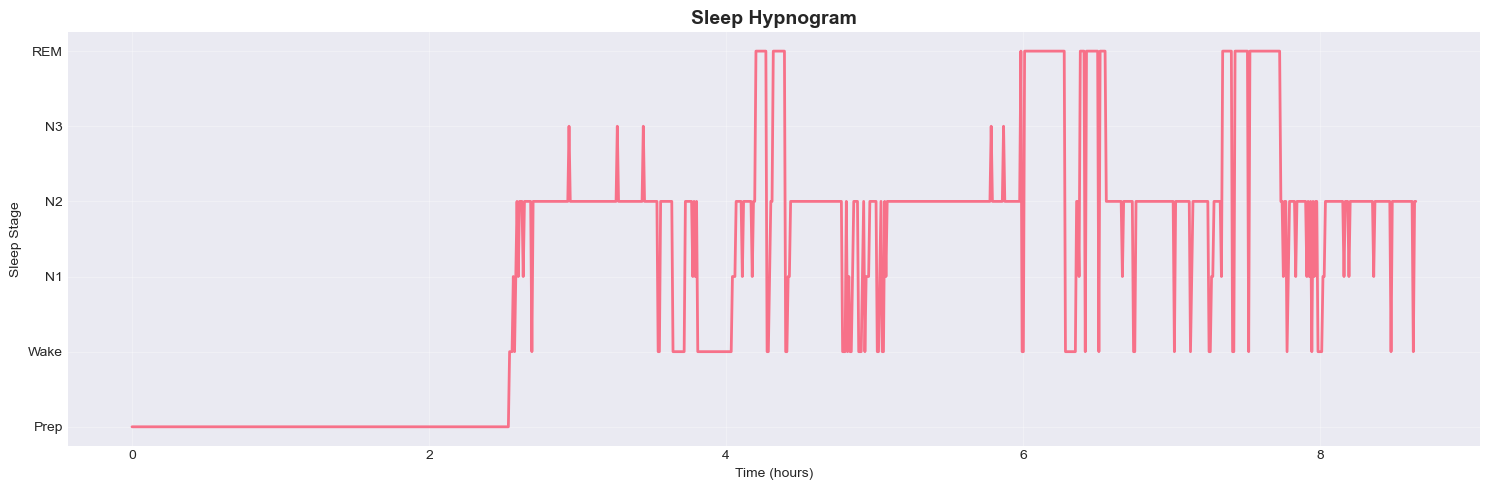

In [7]:
# %% [markdown]
# # 4. Sleep Hypnogram

# %%
# Create hypnogram (sleep stage over time)
# Sample every 30 seconds (sleep stage annotation frequency)
hypno_data = df.groupby(df['TIMESTAMP'] // 30).agg({
    'TIMESTAMP': 'first',
    'Sleep_Stage': 'first'
}).reset_index(drop=True)

# Map stages to numeric for plotting
stage_map = {'P': -1, 'W': 0, 'N1': 1, 'N2': 2, 'N3': 3, 'R': 4, 'Missing': -2}
hypno_data['stage_numeric'] = hypno_data['Sleep_Stage'].map(stage_map)

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(hypno_data['TIMESTAMP'] / 3600, hypno_data['stage_numeric'], linewidth=2)
ax.set_title('Sleep Hypnogram', fontsize=14, fontweight='bold')
ax.set_xlabel('Time (hours)')
ax.set_ylabel('Sleep Stage')
ax.set_yticks([-1, 0, 1, 2, 3, 4])
ax.set_yticklabels(['Prep', 'Wake', 'N1', 'N2', 'N3', 'REM'])
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [9]:
# %% [markdown]
# # 5. Preprocess Data

# %%
# Run preprocessing pipeline
preprocessor = DREAMTPreprocessor(use_simplified_stages=True)

csv_path = str(csv_files[0])
save_path = str(PROCESSED_DATA_DIR / f"{csv_files[0].stem}_processed.npz")

result = preprocessor.process_patient(csv_path, save_path)

# %%
# Inspect processed data
print("\nProcessed Data Summary:")
print(f"X shape: {result['X'].shape}")
print(f"  - {result['X'].shape[0]} windows")
print(f"  - {result['X'].shape[1]} epochs per window")
print(f"  - {result['X'].shape[2]} time steps per epoch") 
print(f"\ny shape: {result['y'].shape}")
print(f"  - {result['y'].shape[0]} windows")
print(f"  - {result['y'].shape[1]} labels per window")

print(f"\nLabel distribution:")
print(f"  - Wake (0): {np.sum(result['y'] == 0)} epochs")
print(f"  - NREM (1): {np.sum(result['y'] == 1)} epochs")
print(f"  - REM (2): {np.sum(result['y'] == 2)} epochs")


Processing patient: S005_whole_df
Loading data from: /Users/dawoudmahmud/WatchSleepNet/WatchSleepNet-Reproduction/data/raw/S005_whole_df.csv
Loaded 1991873 rows
Columns: ['TIMESTAMP', 'BVP', 'ACC_X', 'ACC_Y', 'ACC_Z', 'TEMP', 'EDA', 'HR', 'IBI', 'Sleep_Stage', 'Obstructive_Apnea', 'Central_Apnea', 'Hypopnea', 'Multiple_Events']

Cleaning data...
Removed 584512 preparation stage rows
Final cleaned data: 1407361 rows

Aligning labels to epochs...
Created 734 epochs

Mapping sleep stages to numeric labels...

Label distribution:
  N1 (label 1): 74880 samples
  N2 (label 1): 922433 samples
  N3 (label 1): 9600 samples
  R (label 2): 222720 samples
  W (label 0): 177728 samples

Creating windows (window_size=20, overlap=0.5)...
Created 72 windows

Combining features into single channel...

Resampling to fixed length (960 samples per epoch)...
Final shape: (72, 20, 960)

Normalizing features...
Normalization: mean=65.18, std=1.31

Processing complete!
  X shape: (72, 20, 960)
  y shape: (72

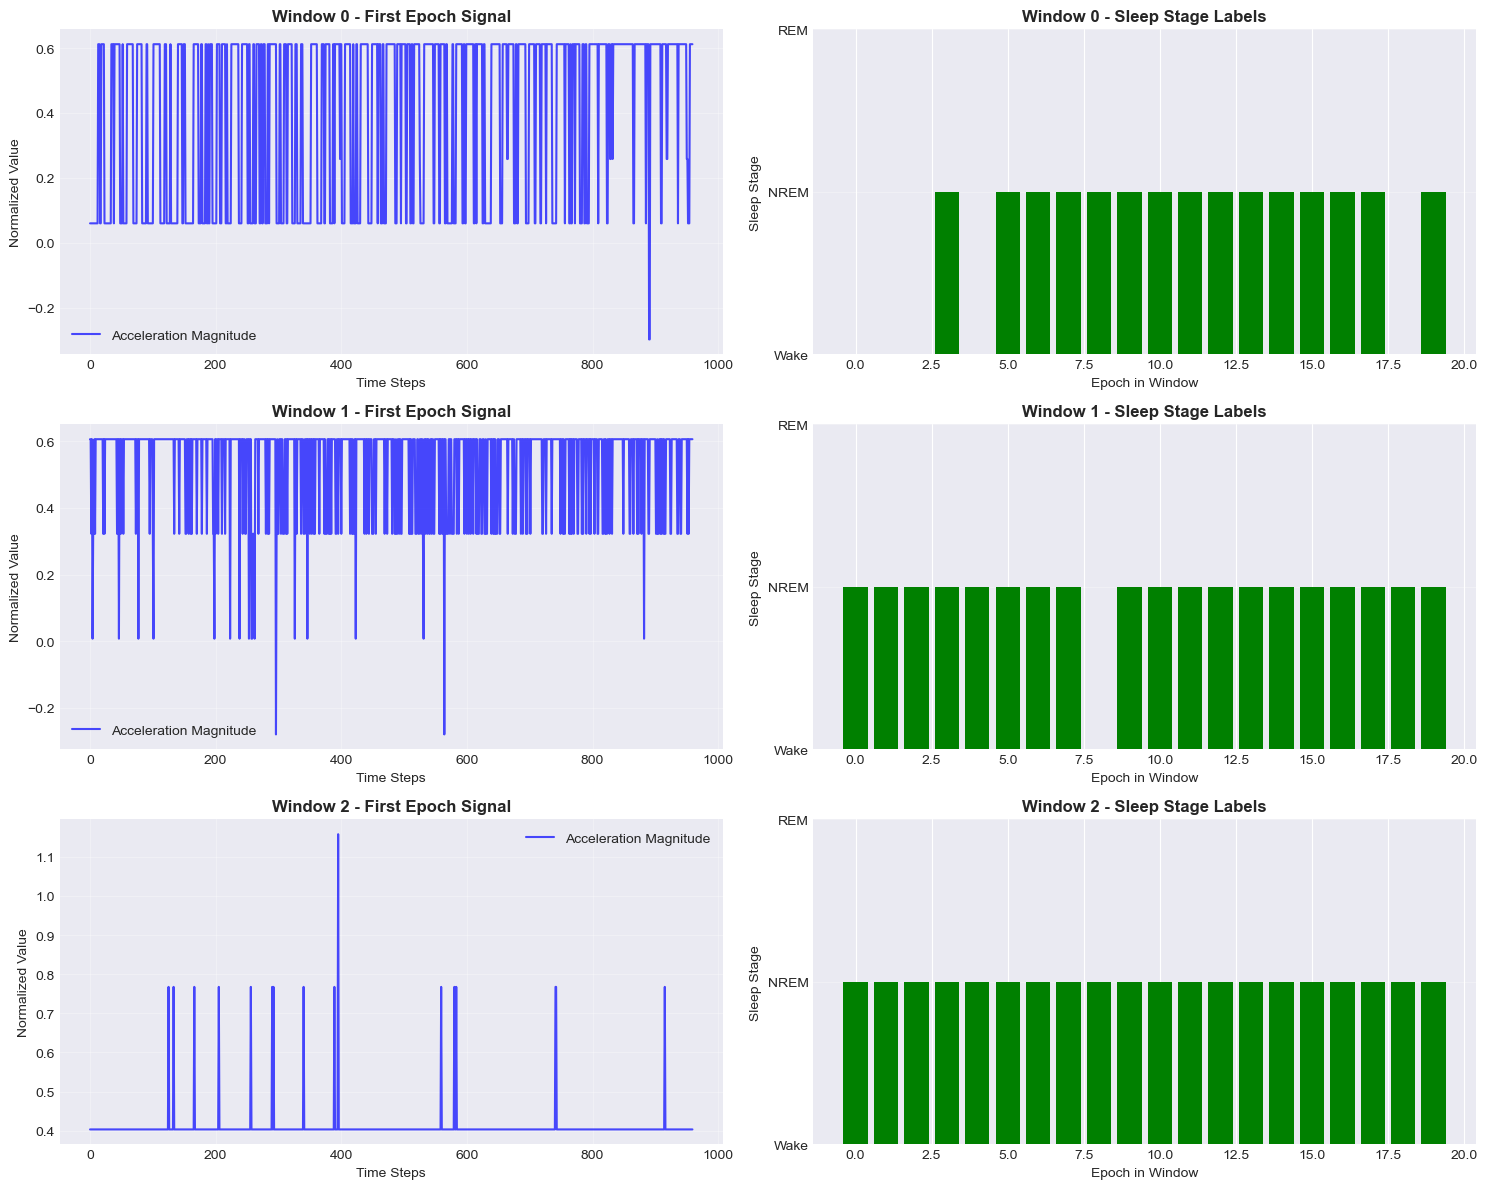

In [11]:
# %% [markdown]
# # 6. Visualize Processed Windows

# Visualize a few processed windows
n_windows_to_show = min(3, len(X))

fig, axes = plt.subplots(n_windows_to_show, 2, figsize=(15, 4*n_windows_to_show))

# Handle case where we only have 1 window
if n_windows_to_show == 1:
    axes = axes.reshape(1, -1)

stage_names = {0: 'Wake', 1: 'NREM', 2: 'REM'}

for i in range(n_windows_to_show):
    # Plot first epoch signals (X is now 3D: windows, epochs, timesteps)
    axes[i, 0].plot(X[i, 0, :], label='Acceleration Magnitude', alpha=0.7, color='blue')
    axes[i, 0].set_title(f'Window {i} - First Epoch Signal', fontweight='bold')
    axes[i, 0].set_ylabel('Normalized Value')
    axes[i, 0].set_xlabel('Time Steps')
    axes[i, 0].legend()
    axes[i, 0].grid(True, alpha=0.3)
    
    # Plot labels for all epochs in this window
    labels = y[i]
    colors = ['blue' if l == 0 else 'green' if l == 1 else 'red' for l in labels]
    axes[i, 1].bar(range(len(labels)), labels, color=colors)
    axes[i, 1].set_title(f'Window {i} - Sleep Stage Labels', fontweight='bold')
    axes[i, 1].set_ylabel('Sleep Stage')
    axes[i, 1].set_xlabel('Epoch in Window')
    axes[i, 1].set_yticks([0, 1, 2])
    axes[i, 1].set_yticklabels(['Wake', 'NREM', 'REM'])
    axes[i, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

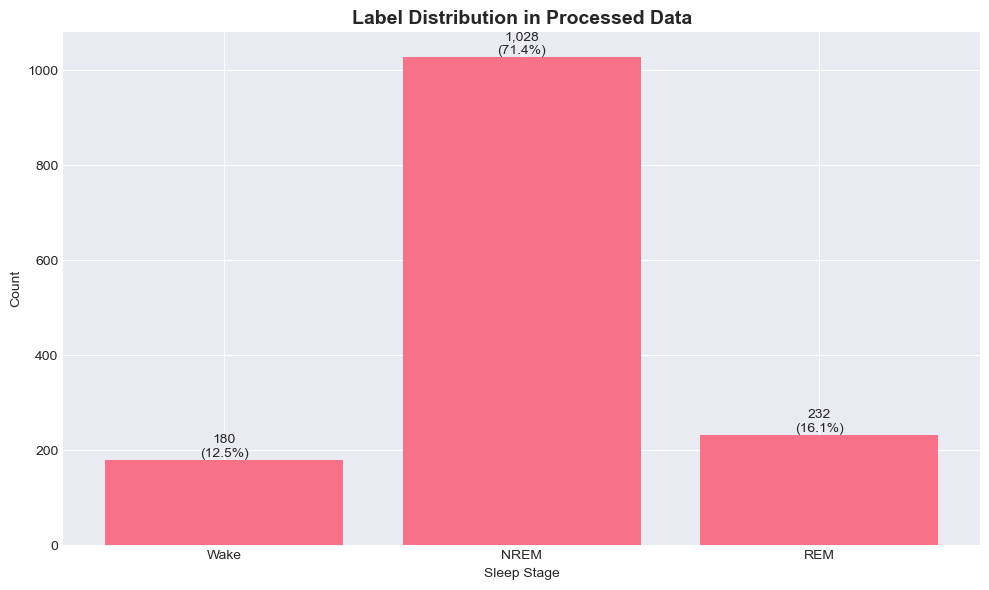


Class distribution:
  Wake: 180 (12.5%)
  NREM: 1,028 (71.4%)
  REM: 232 (16.1%)

✅ Data exploration complete!
Processed data saved to: /Users/dawoudmahmud/WatchSleepNet/WatchSleepNet-Reproduction/data/processed/S005_whole_df_processed.npz

Next steps:
  1. Process remaining patients
  2. Implement the WatchSleepNet model
  3. Set up training pipeline


In [12]:
# %% [markdown]
# # 7. Label Distribution in Processed Data

# %%
# Check class balance
all_labels = y.flatten()
unique, counts = np.unique(all_labels, return_counts=True)

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar([stage_names[u] for u in unique], counts)
ax.set_title('Label Distribution in Processed Data', fontsize=14, fontweight='bold')
ax.set_ylabel('Count')
ax.set_xlabel('Sleep Stage')

# Add count labels on bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height):,}\n({height/len(all_labels)*100:.1f}%)',
            ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("\nClass distribution:")
for u, c in zip(unique, counts):
    print(f"  {stage_names[u]}: {c:,} ({c/len(all_labels)*100:.1f}%)")

# %%
print("\n✅ Data exploration complete!")
print(f"Processed data saved to: {save_path}")
print("\nNext steps:")
print("  1. Process remaining patients")
print("  2. Implement the WatchSleepNet model")
print("  3. Set up training pipeline")